# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.094692e+01     6.804291e+00
 * time: 0.0052738189697265625
     1     2.685839e+01     5.219947e+00
 * time: 0.02501702308654785
     2     2.098579e+01     5.018041e+00
 * time: 0.04896688461303711
     3     1.555925e+01     3.525391e+00
 * time: 0.07310891151428223
     4     1.250593e+01     1.348293e+00
 * time: 0.09733986854553223
     5     1.163860e+01     2.010944e+00
 * time: 0.11655402183532715
     6     1.121264e+01     1.369856e+00
 * time: 0.13538479804992676
     7     1.082464e+01     9.874155e-01
 * time: 0.15423583984375
     8     1.052325e+01     9.450721e-01
 * time: 0.17351198196411133
     9     1.029112e+01     8.758782e-01
 * time: 0.19311881065368652
    10     1.011521e+01     5.065616e-01
 * time: 0.21283888816833496
    11     1.010133e+01     1.196685e+00
 * time: 0.22776389122009277
    12     9.944268e+00     5.965736e-01
 * time: 0.2426760196685791
    13     9.871563e+00     6.353360e-01
 * time: 0

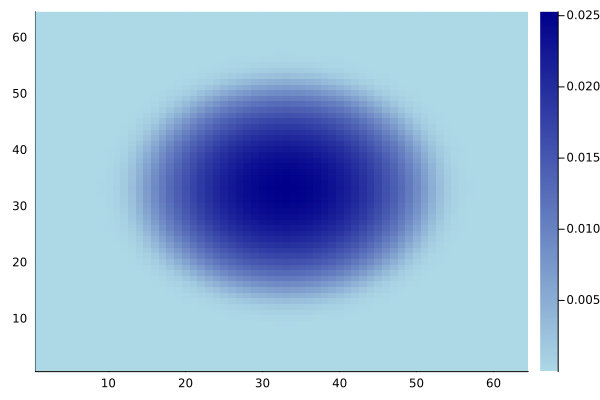

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)